In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [143]:
df = pd.read_csv('grafo.csv')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   n             1300 non-null   int64  
 1   prob          1300 non-null   float64
 2   Dirac         1300 non-null   int64  
 3   Ore           1300 non-null   int64  
 4   Bondy_Chvatl  1300 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 50.9 KB


In [145]:
df

,n,prob,Dirac,Ore,Bondy_Chvatl
0,6,0.0,0,0,0
1,6,0.0,0,0,0
2,6,0.0,0,0,0
3,6,0.0,0,0,0
4,6,0.0,0,0,0
...,...,...,...,...,...
1295,1000,1.0,1,1,1
1296,1000,1.0,1,1,1
1297,1000,1.0,1,1,1
1298,1000,1.0,1,1,1


In [146]:
#Filtra apenas as linhas pelo n
n_6 = df[df['n'] == 6]
n_8 = df[df['n'] == 8]
n_10 = df[df['n'] == 10]
n_12 = df[df['n'] == 12]
n_15 = df[df['n'] == 15]
n_20 = df[df['n'] == 20]
n_30 = df[df['n'] == 30]
n_40 = df[df['n'] == 40]
n_50 = df[df['n'] == 50]
n_100 = df[df['n'] == 100]
n_250 = df[df['n'] == 250]
n_500 = df[df['n'] == 500]
n_1000 = df[df['n'] == 1000]

<Figure size 1000x600 with 0 Axes>

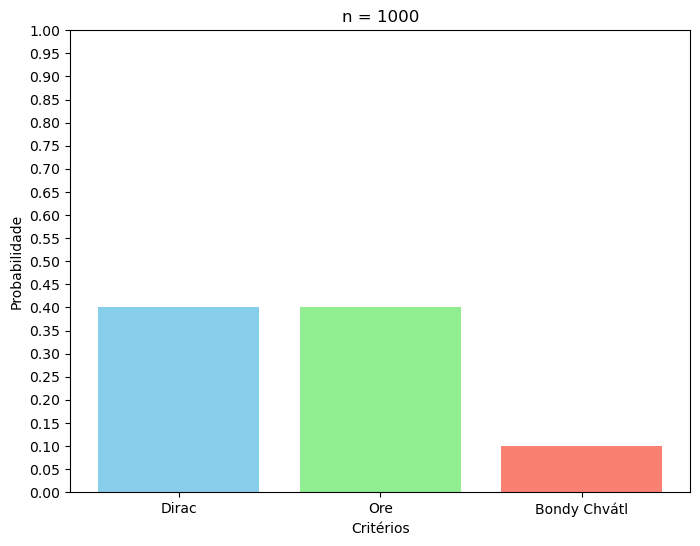

In [153]:
#Grafico de barras para n-individual

plt.figure(figsize=(10, 6))

#Aqui tribui-se a n o valor n_'numero' 
n = n_1000 

prob_dirac = n['Dirac'].mean()
prob_ore = n['Ore'].mean()
prob_bondy = n['Bondy_Chvatl'].mean()

labels = ['Dirac', 'Ore', 'Bondy Chvátal']
prob_values = [prob_dirac, prob_ore, prob_bondy]

plt.figure(figsize=(8, 6))
plt.bar(labels, prob_values, color=['skyblue', 'lightgreen', 'salmon'])

plt.xlabel('Critérios')
plt.ylabel('Probabilidade')

#Substituir pelo mesmo n_'numero' atribuido a n para titulo
plt.title('n = 1000')

plt.ylim(0, 1)
plt.yticks(np.linspace(0, 1, 21))

plt.show()

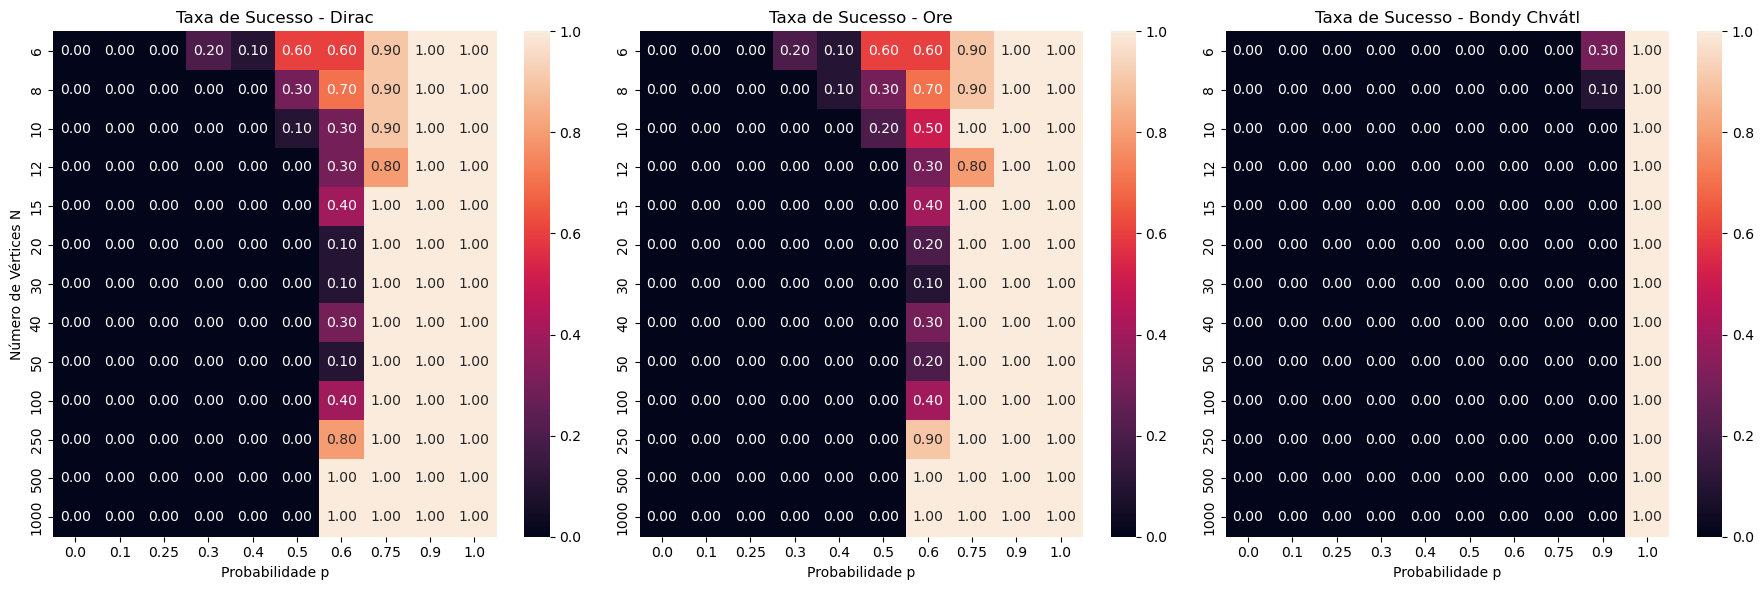

In [152]:
#Heatmap dos 3 teoremas NxP e e taxa de sucesso (quantidade de 1)

n_values = [6, 8, 10, 12, 15, 20, 30, 40, 50, 100, 250, 500, 1000]
p_values = sorted(df['prob'].unique())

taxa_dirac = np.zeros((len(n_values), len(p_values)))
taxa_ore = np.zeros((len(n_values), len(p_values)))
taxa_bondy = np.zeros((len(n_values), len(p_values)))

for i, n in enumerate(n_values):
    subset = df[df['n'] == n]
    for j, p in enumerate(p_values):
        subset_p = subset[subset['prob'] == p]
        taxa_dirac[i, j] = subset_p['Dirac'].mean()
        taxa_ore[i, j] = subset_p['Ore'].mean()
        taxa_bondy[i, j] = subset_p['Bondy_Chvatl'].mean()

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(taxa_dirac, annot=True, fmt=".2f", xticklabels=p_values, yticklabels=n_values, ax=axs[0])
axs[0].set_title("Taxa de Sucesso - Dirac")
axs[0].set_xlabel("Probabilidade p")
axs[0].set_ylabel("Número de Vértices N")

sns.heatmap(taxa_ore, annot=True, fmt=".2f", xticklabels=p_values, yticklabels=n_values, ax=axs[1])
axs[1].set_title("Taxa de Sucesso - Ore")
axs[1].set_xlabel("Probabilidade p")

sns.heatmap(taxa_bondy, annot=True, fmt=".2f", xticklabels=p_values, yticklabels=n_values, ax=axs[2])
axs[2].set_title("Taxa de Sucesso - Bondy Chvátal")
axs[2].set_xlabel("Probabilidade p")

plt.tight_layout()
plt.show()


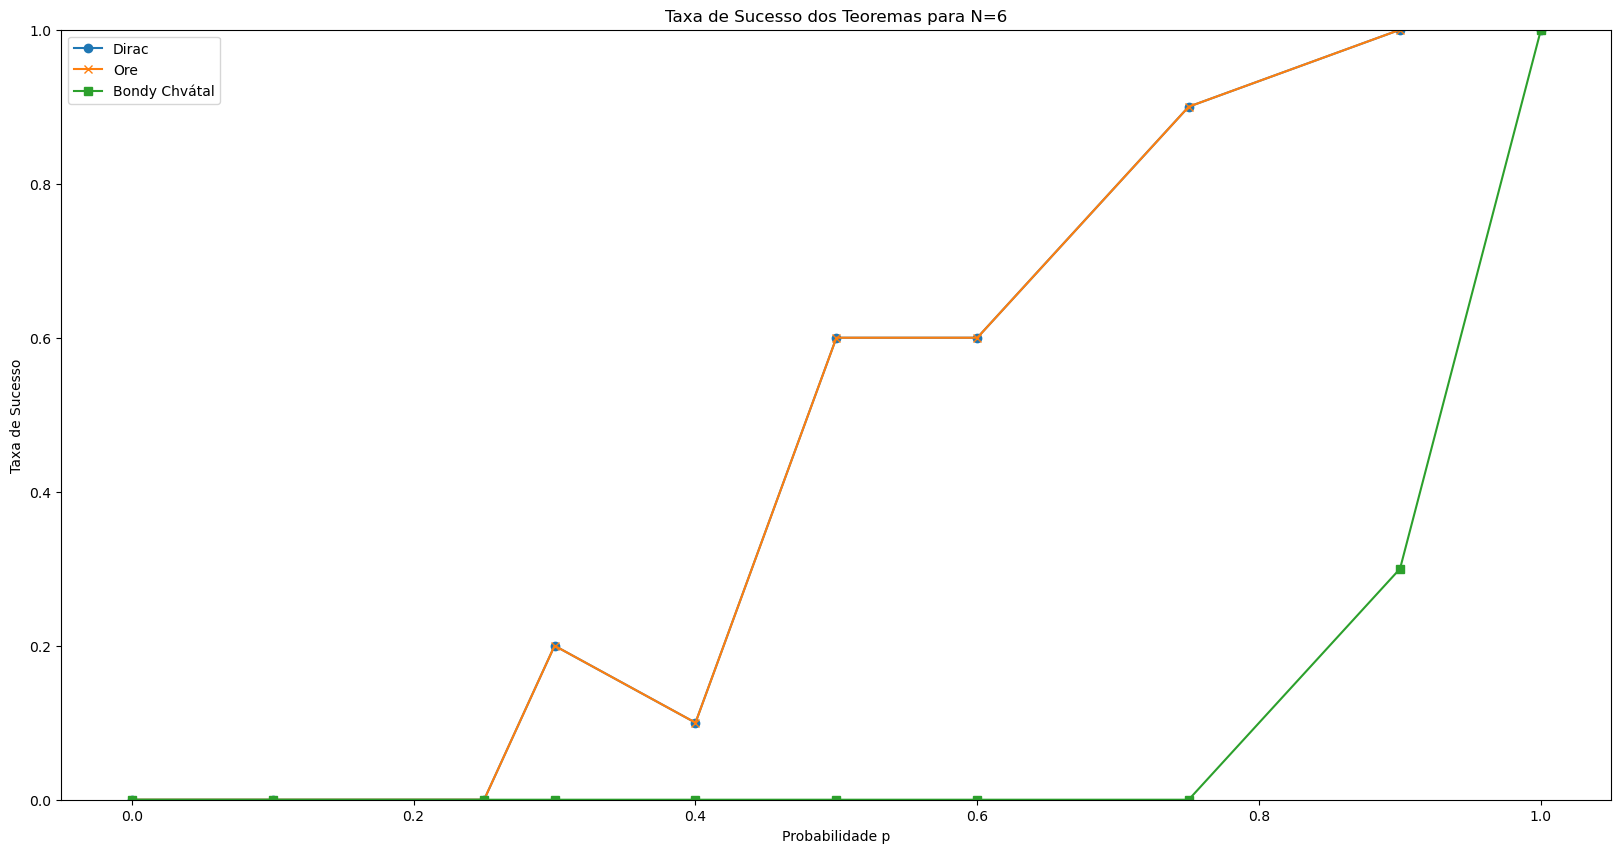

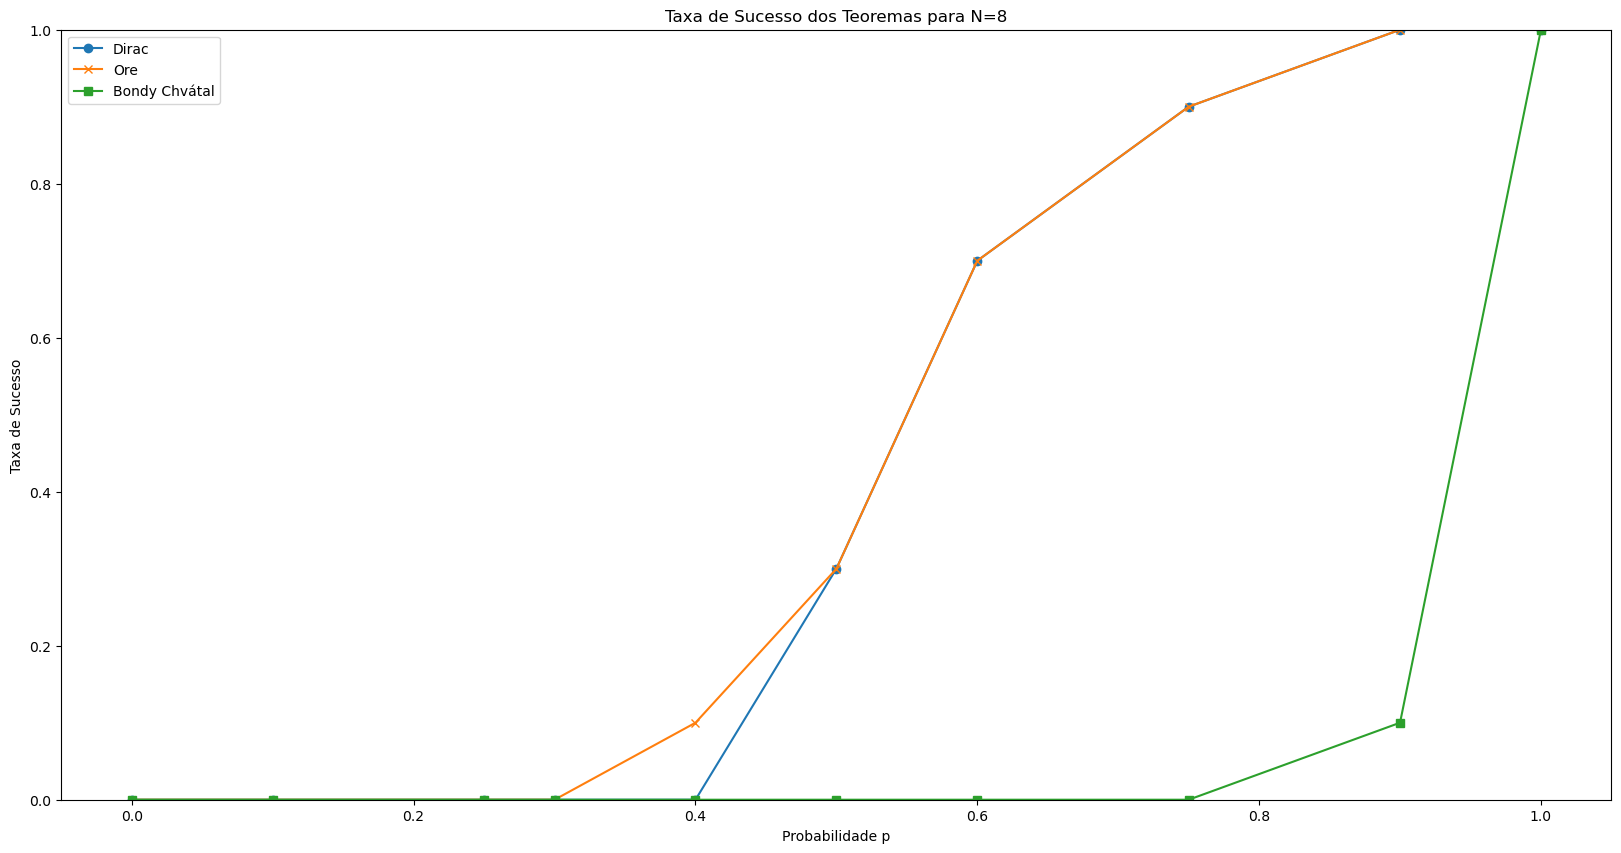

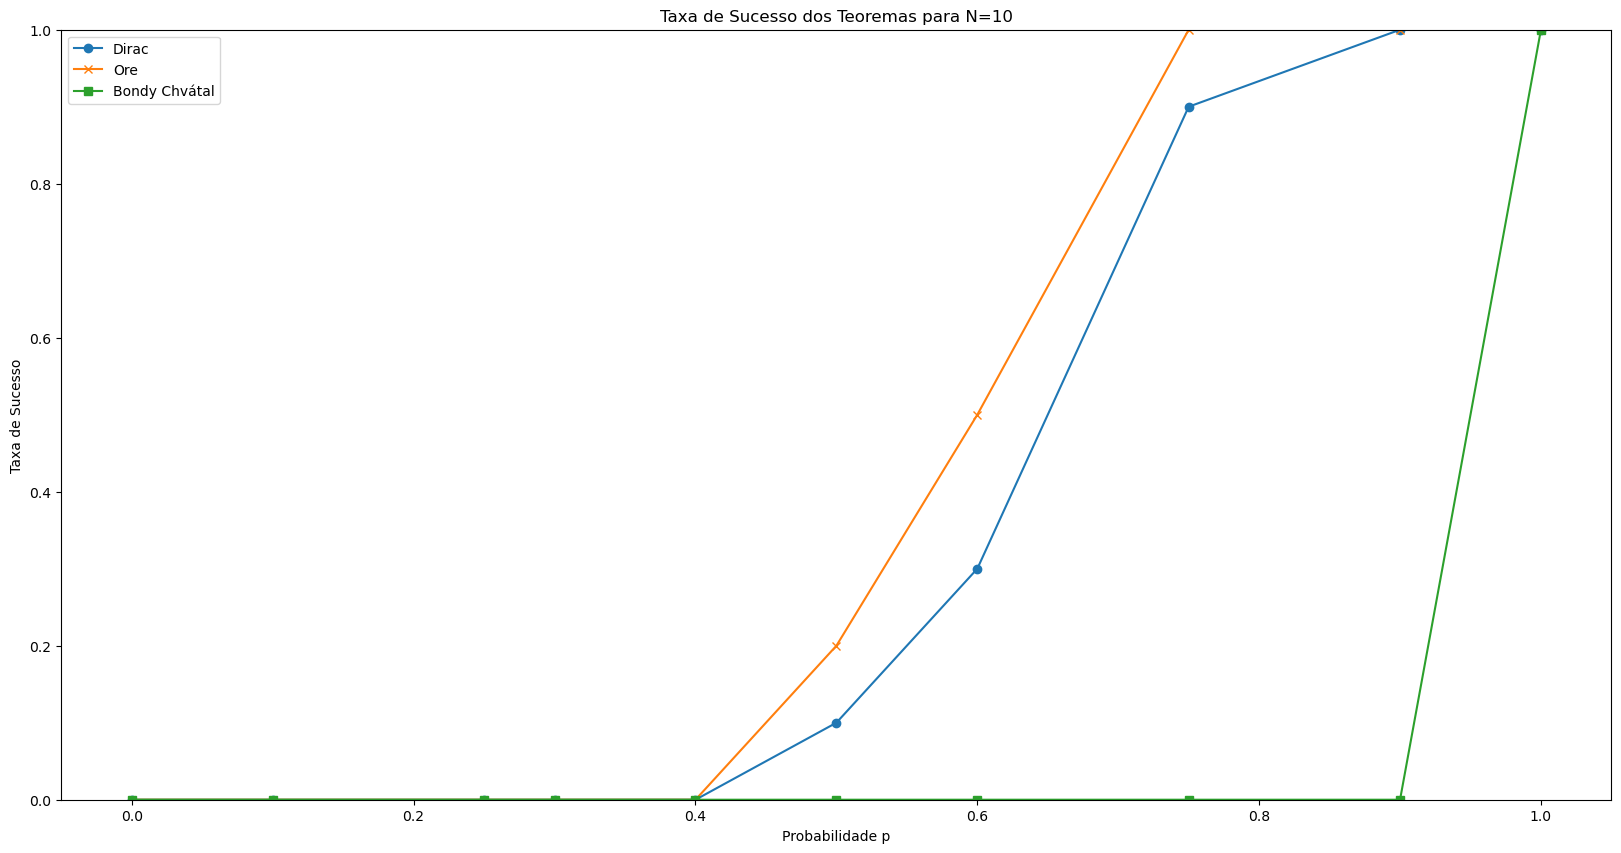

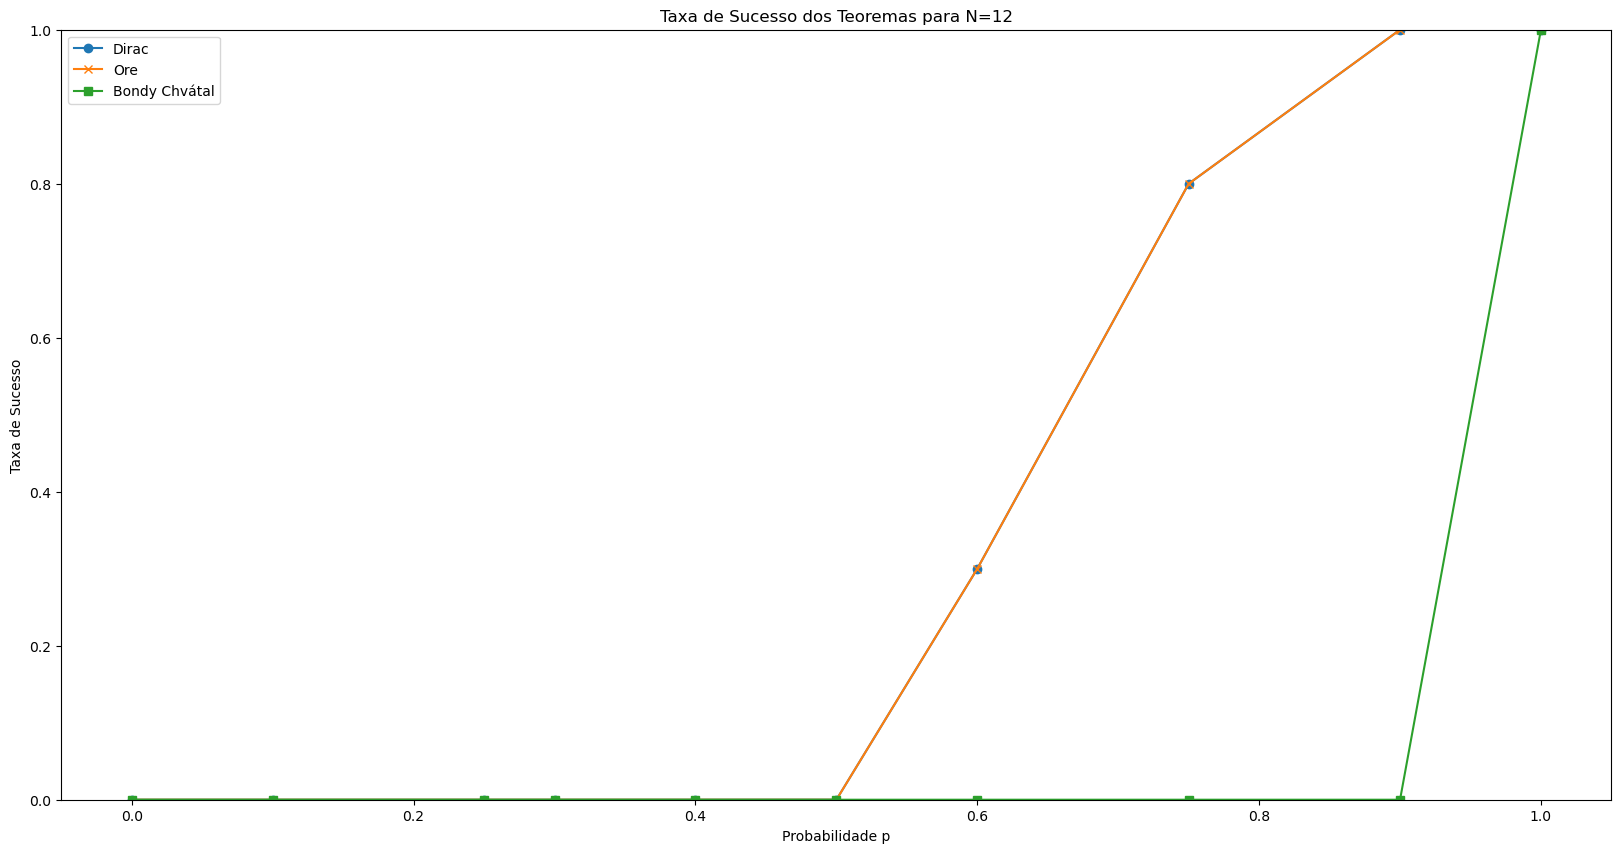

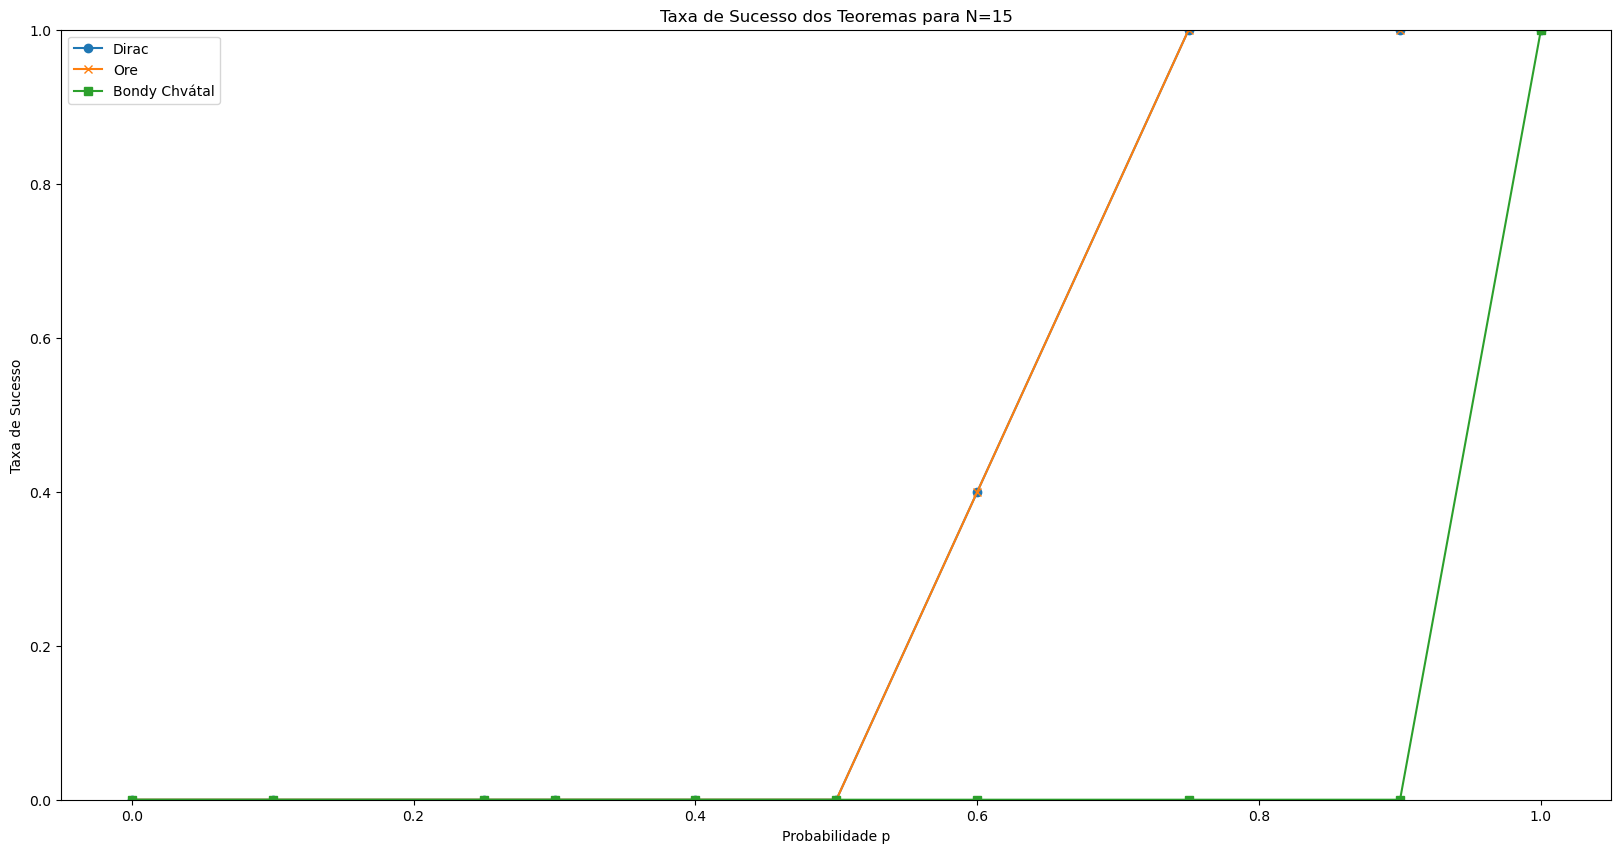

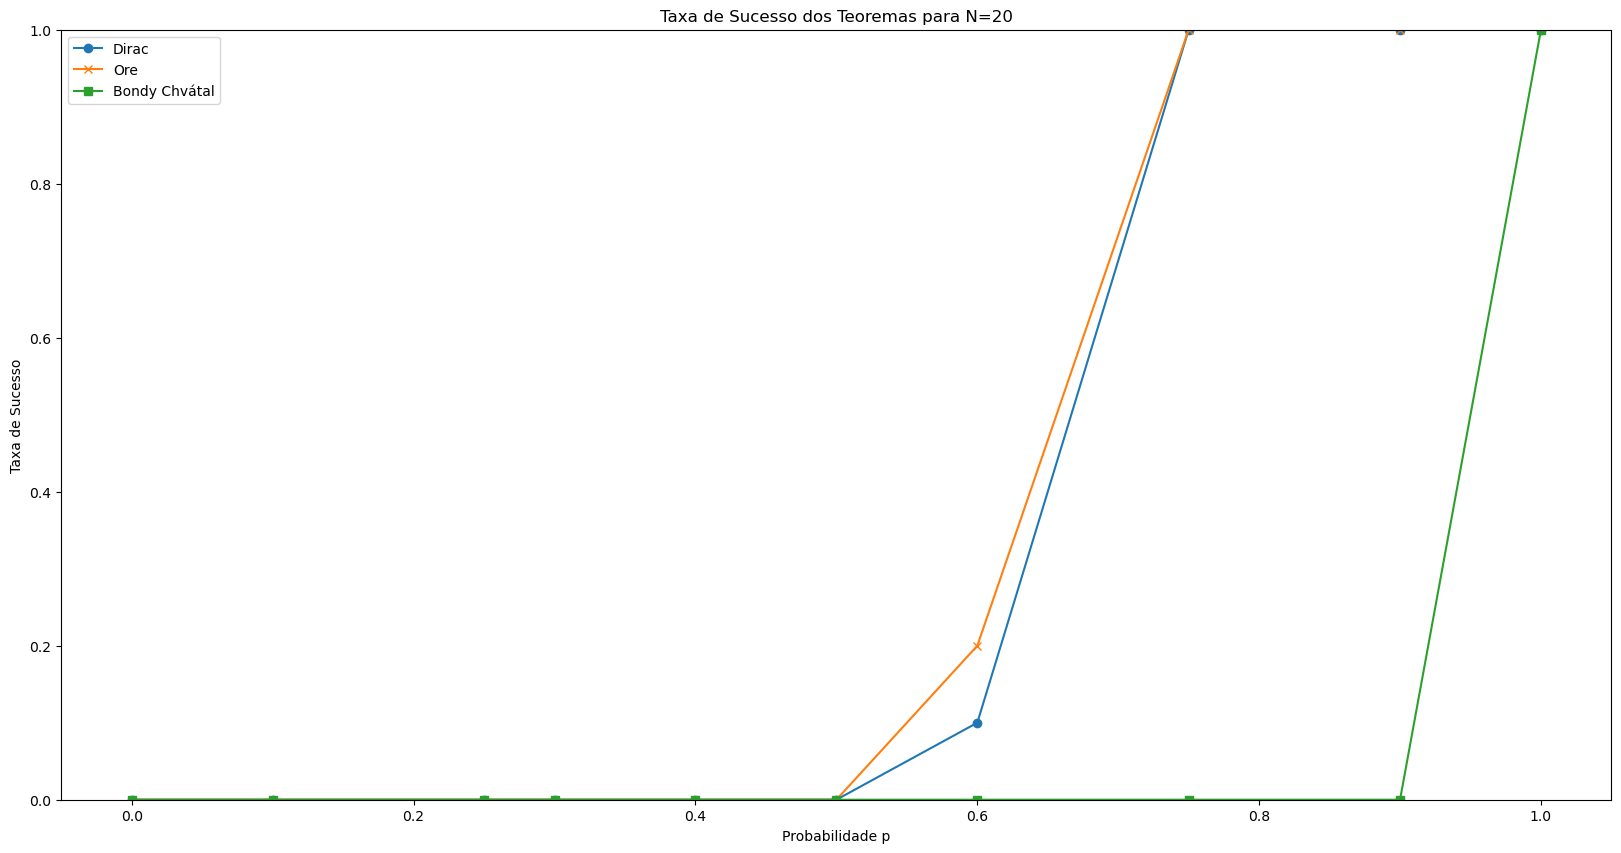

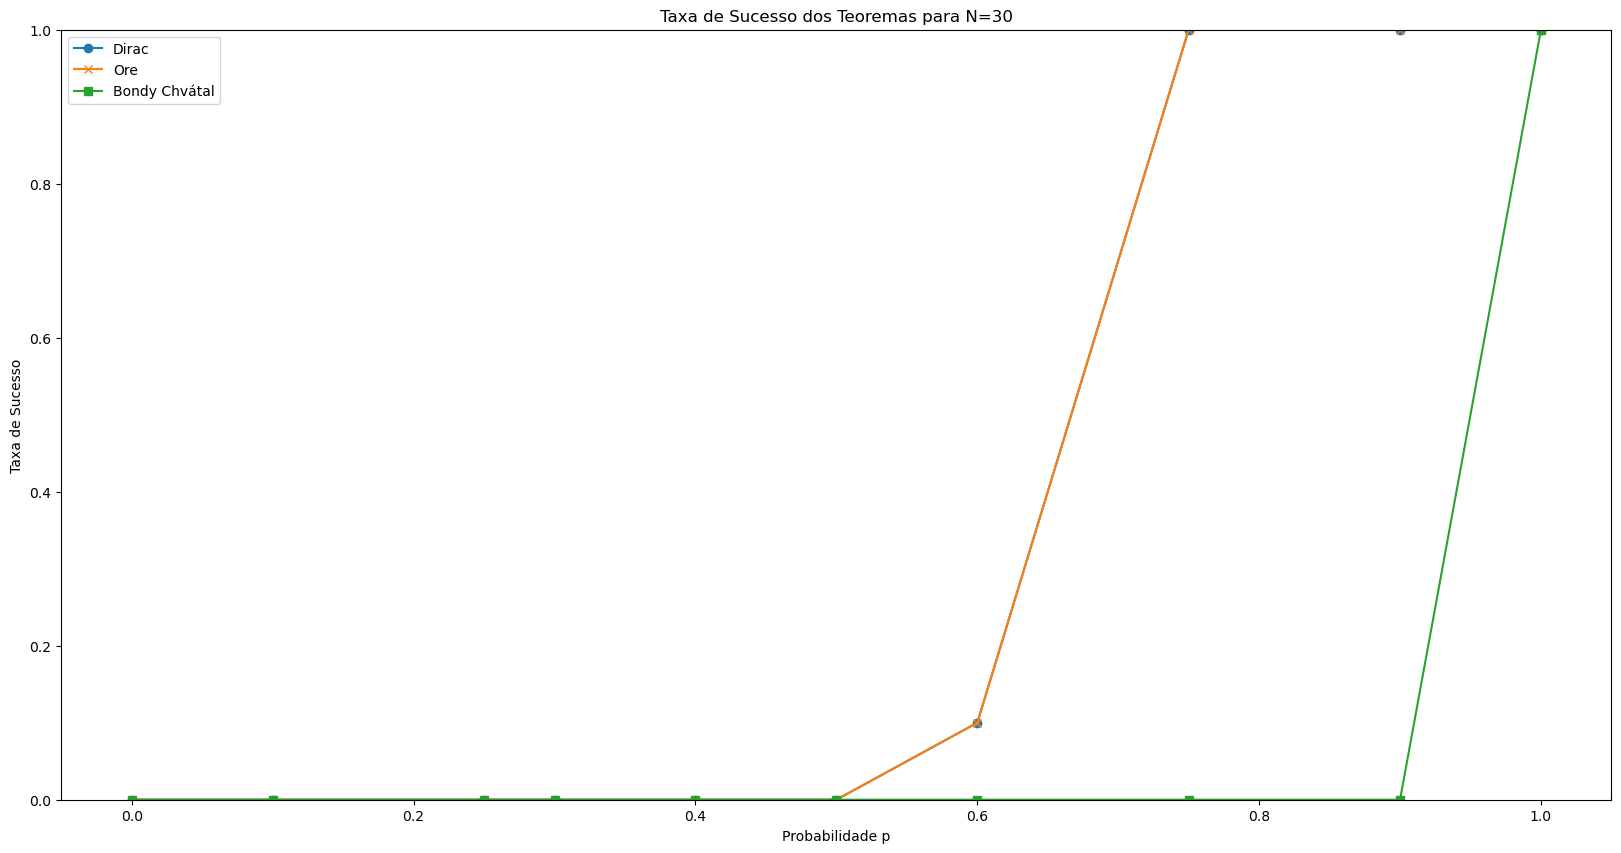

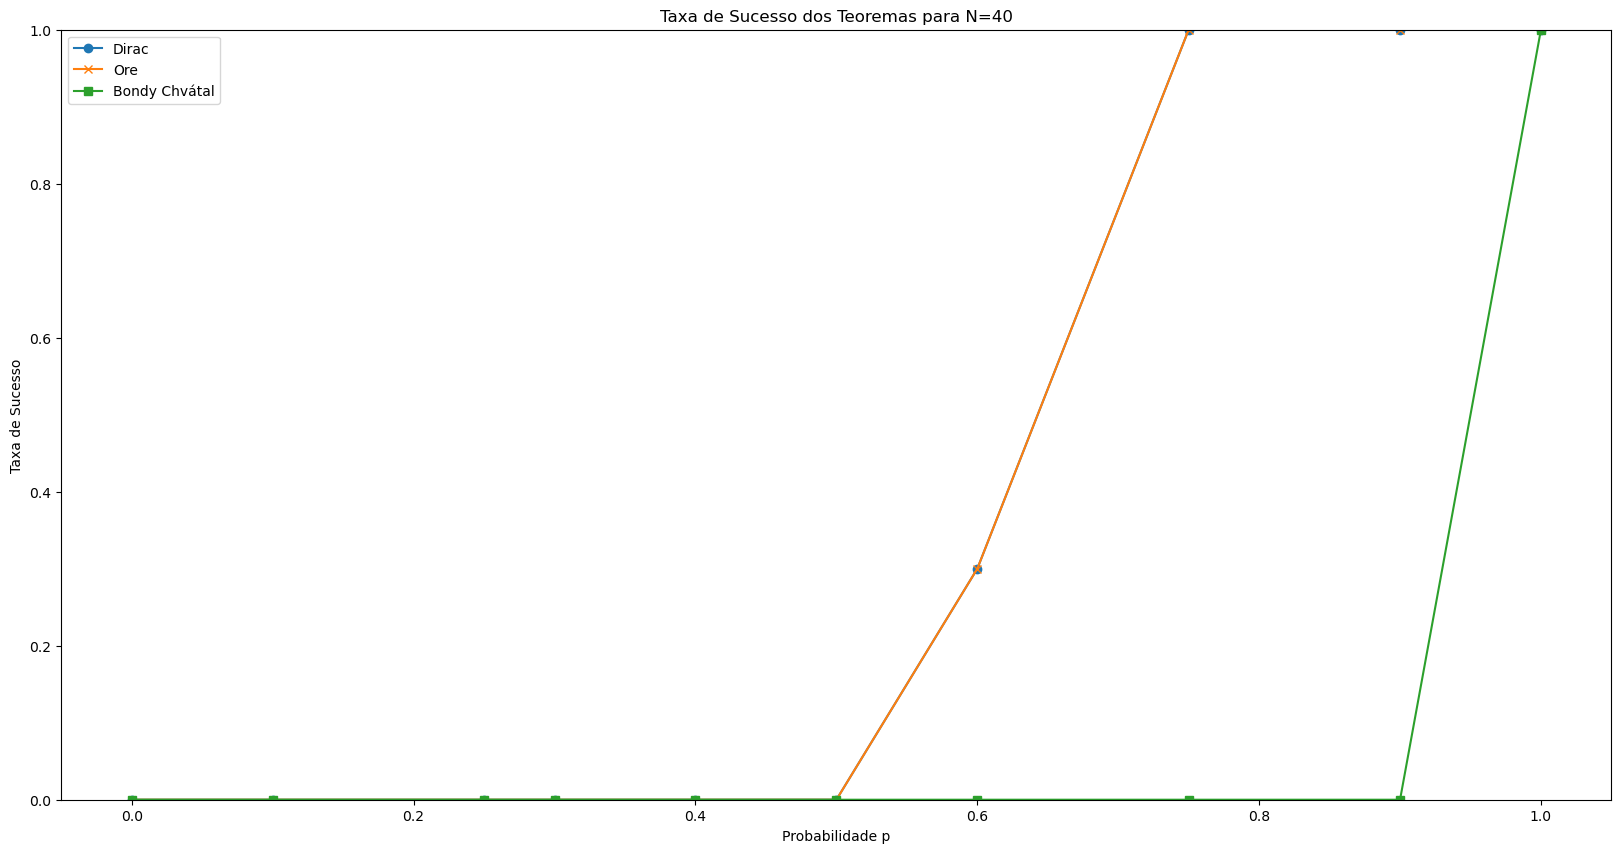

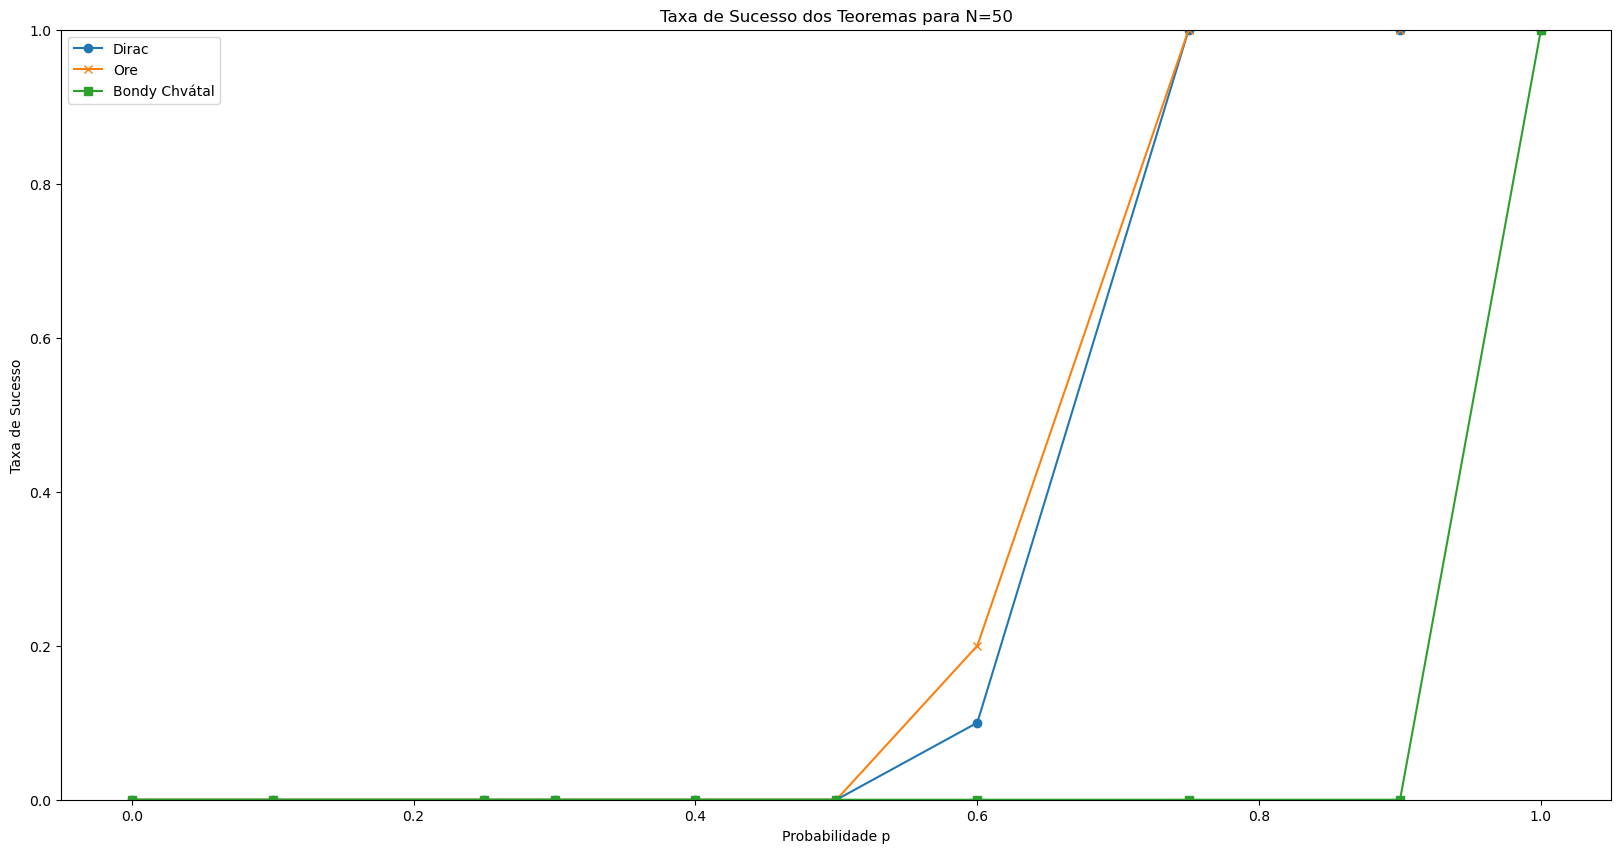

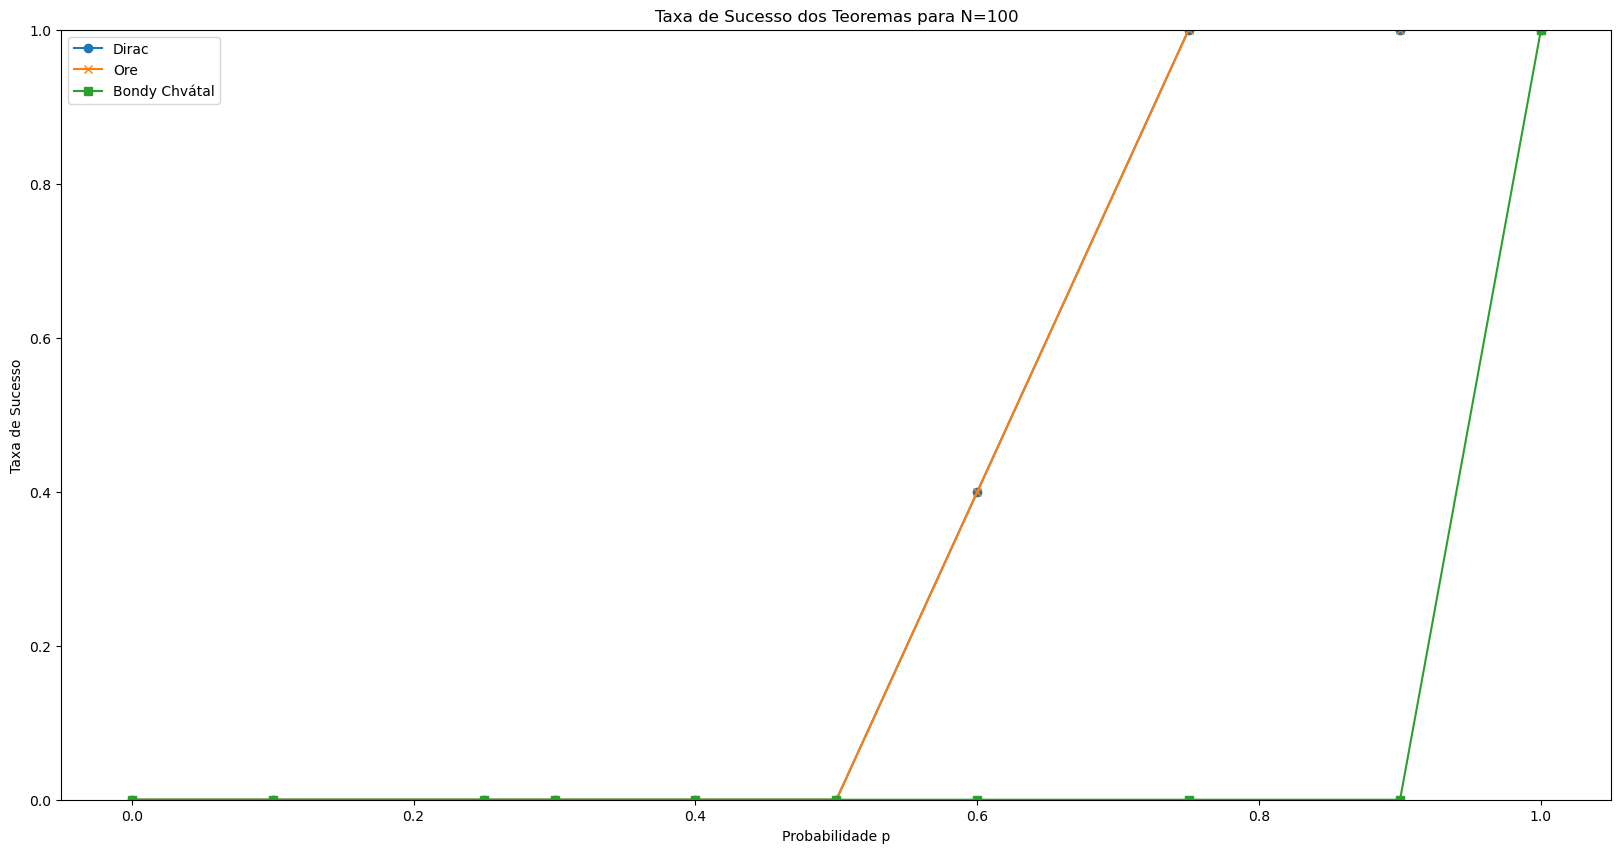

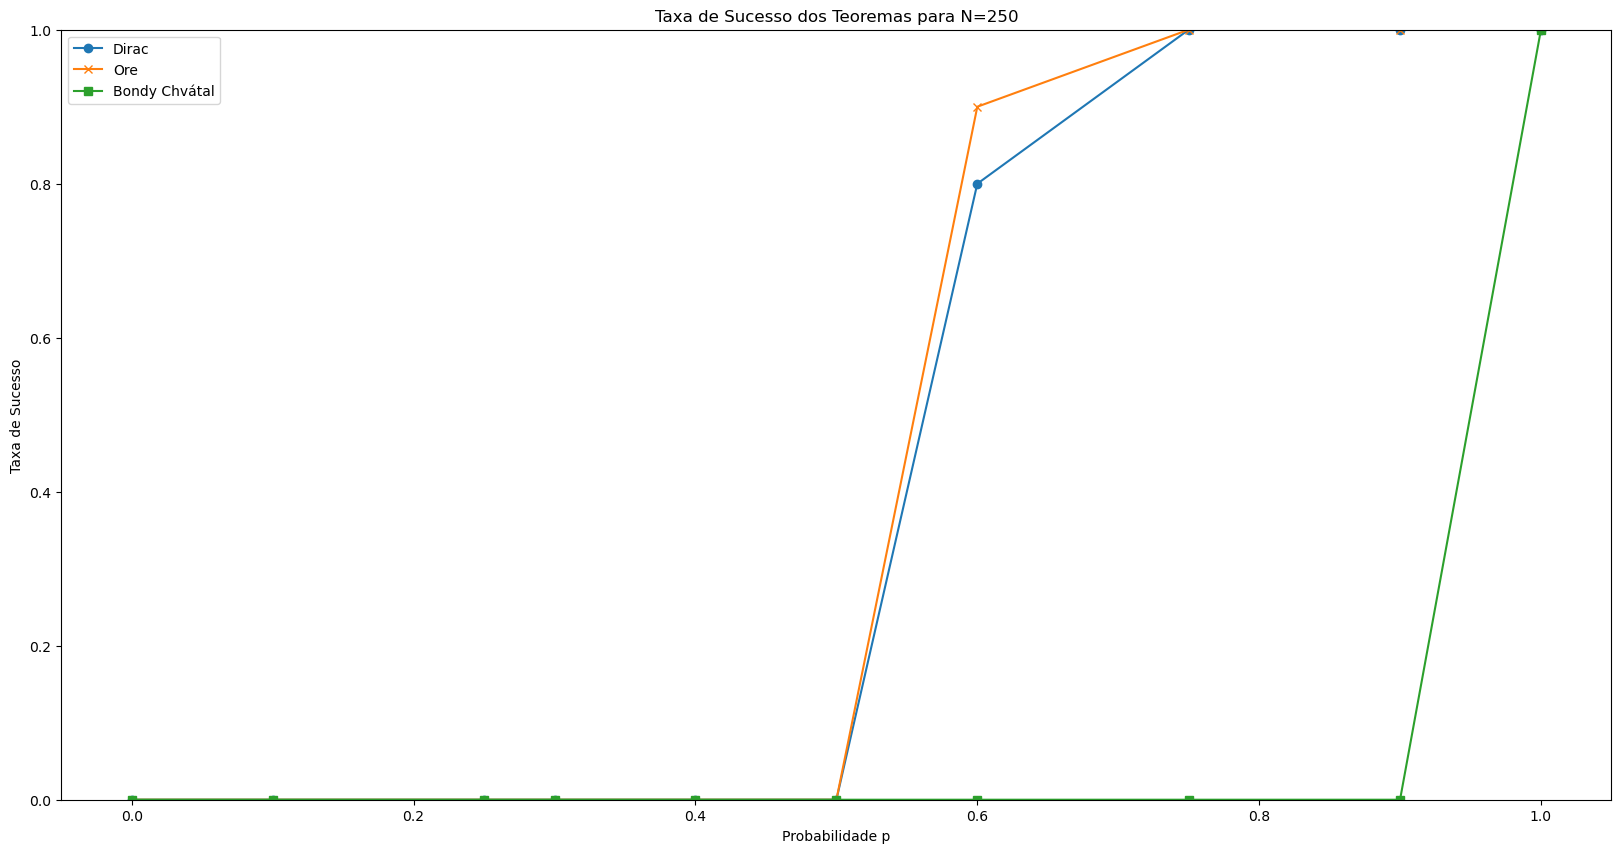

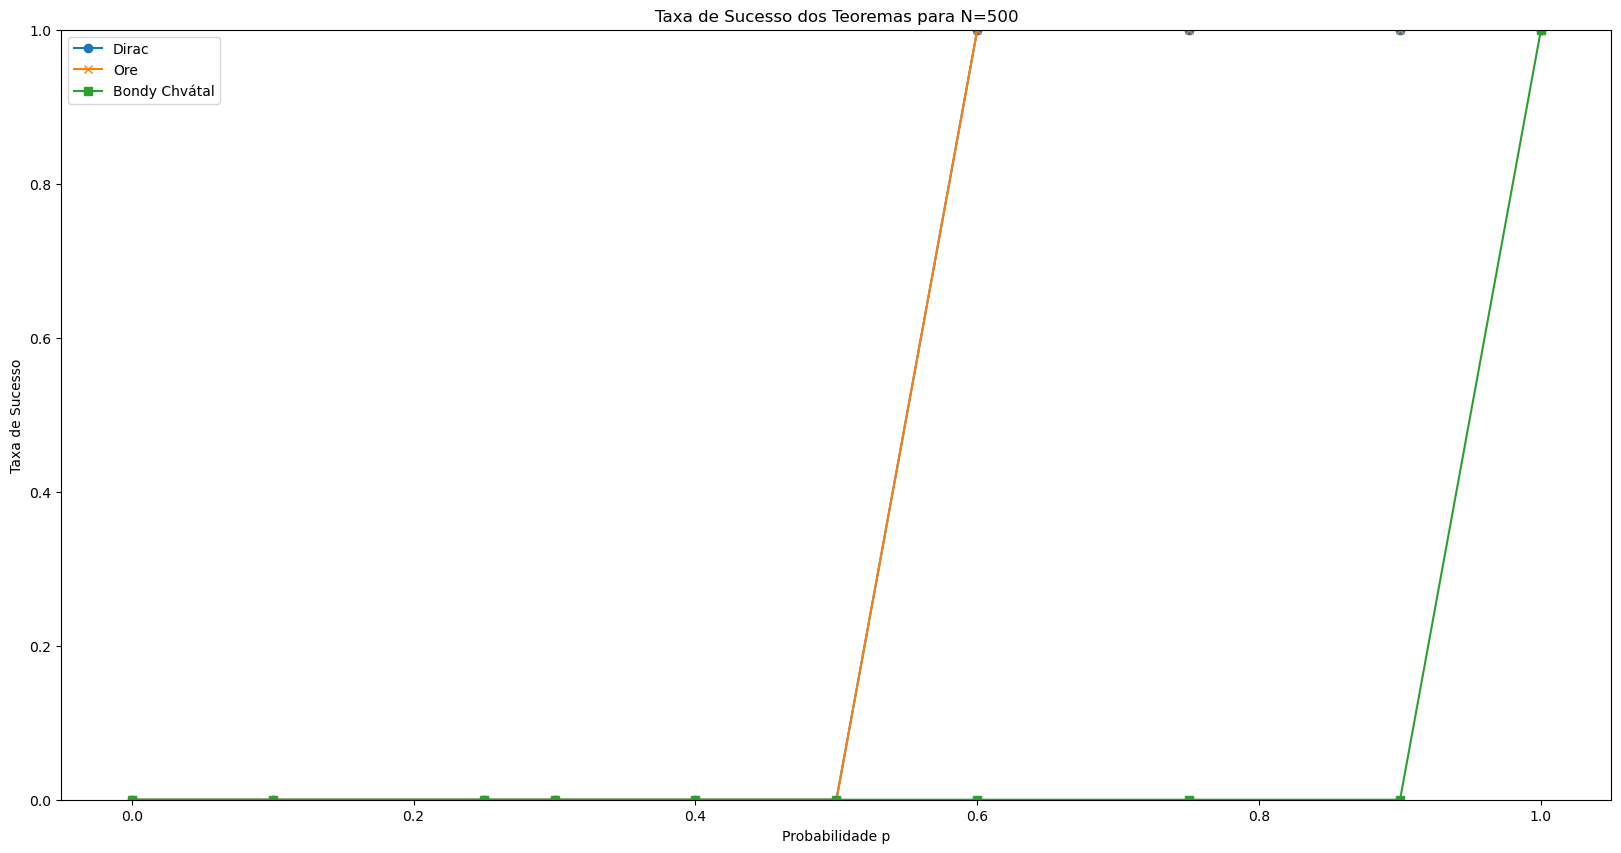

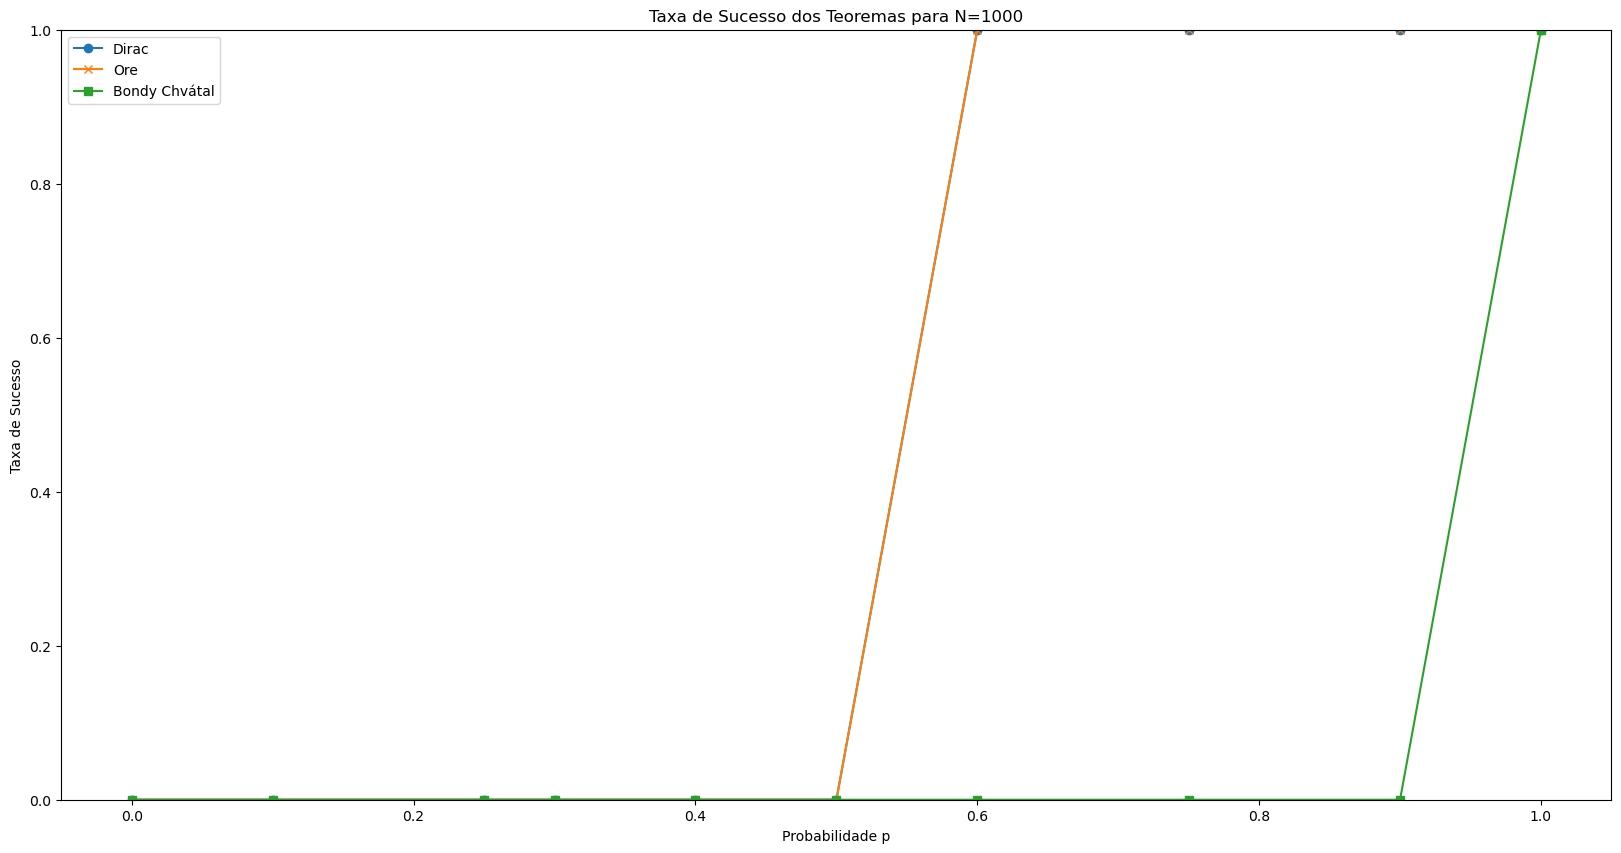

In [156]:
#Grafico de para cada N, taxa de sucesso (quantidade de 1) x p, dos 3 teoremas

for n in n_values:
    subset = df[df['n'] == n]
    prob_values = subset['prob'].unique()
    
    dirac_means = [subset[subset['prob'] == p]['Dirac'].mean() for p in prob_values]
    ore_means = [subset[subset['prob'] == p]['Ore'].mean() for p in prob_values]
    bondy_means = [subset[subset['prob'] == p]['Bondy_Chvatl'].mean() for p in prob_values]
    
    plt.figure(figsize=(10, 5))
    plt.plot(prob_values, dirac_means, label='Dirac', marker='o')
    plt.plot(prob_values, ore_means, label='Ore', marker='x')
    plt.plot(prob_values, bondy_means, label='Bondy Chvátal', marker='s')
    
    plt.title(f"Taxa de Sucesso dos Teoremas para N={n}")
    plt.xlabel("Probabilidade p")
    plt.ylabel("Taxa de Sucesso")
    plt.ylim(0, 1)
    plt.legend()
    plt.show()


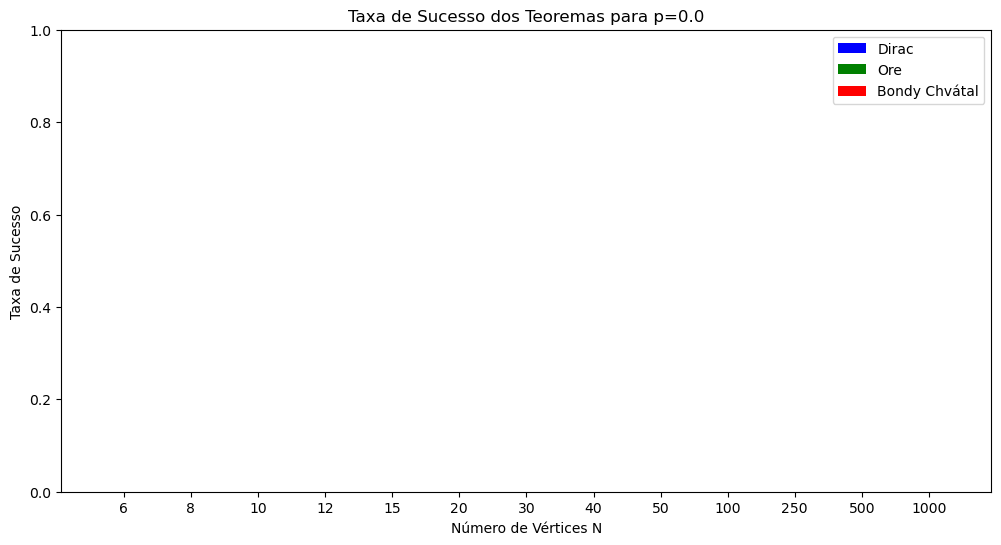

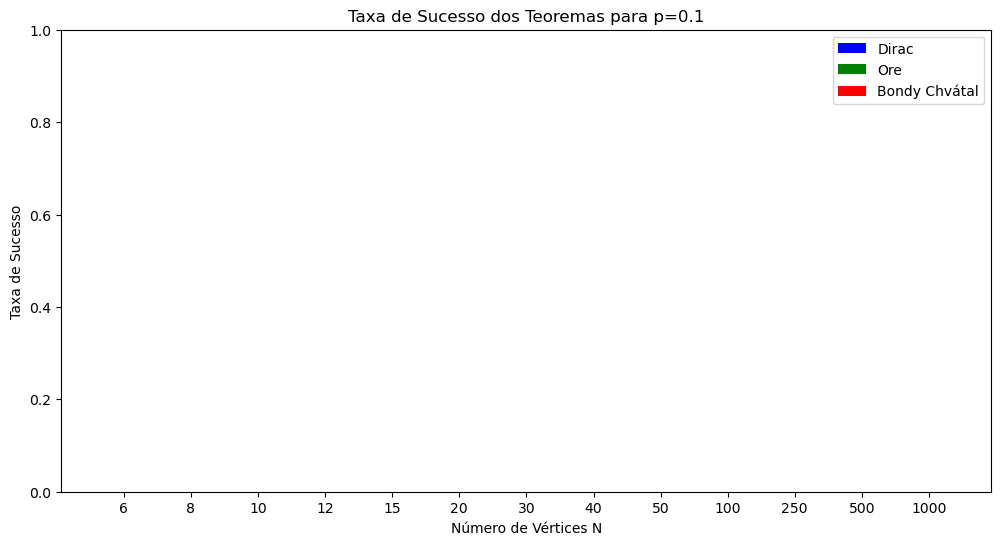

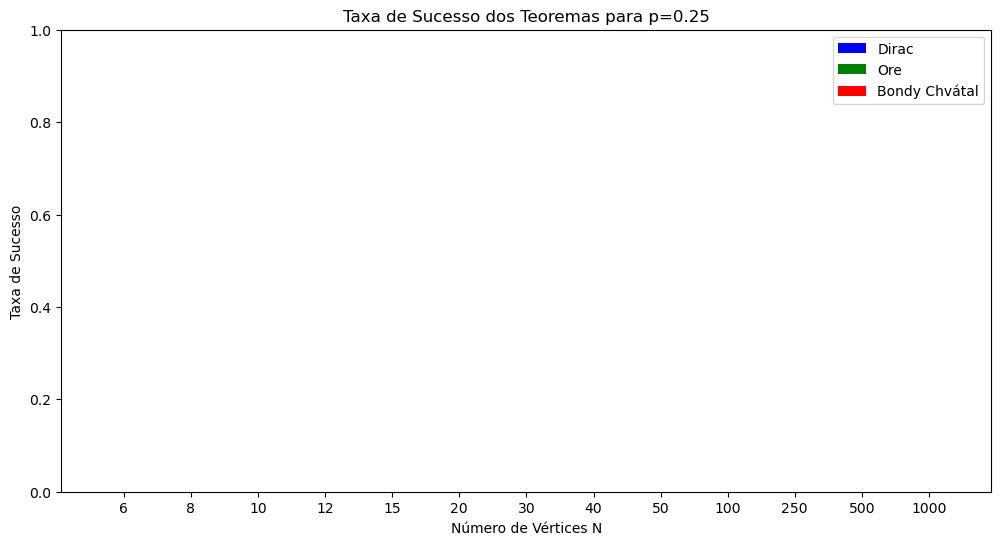

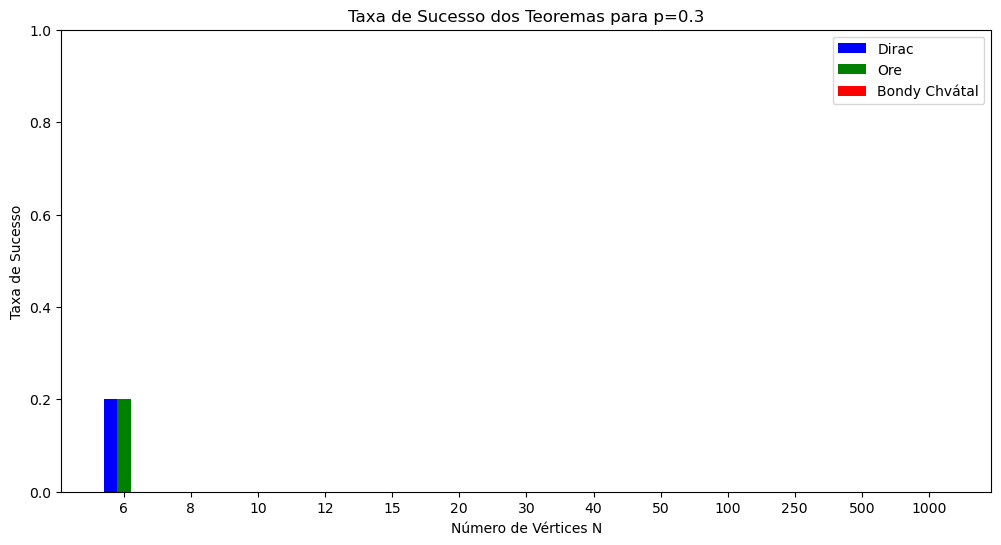

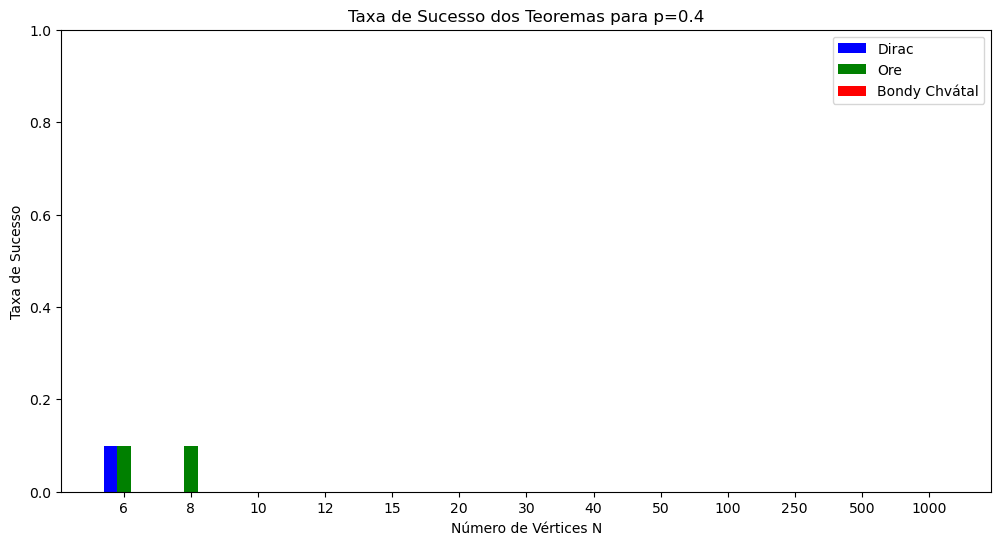

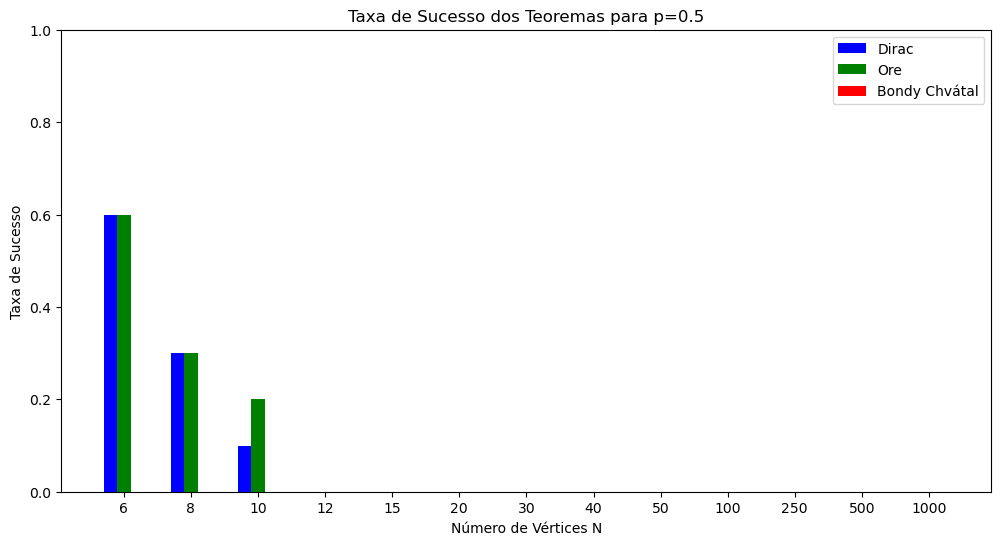

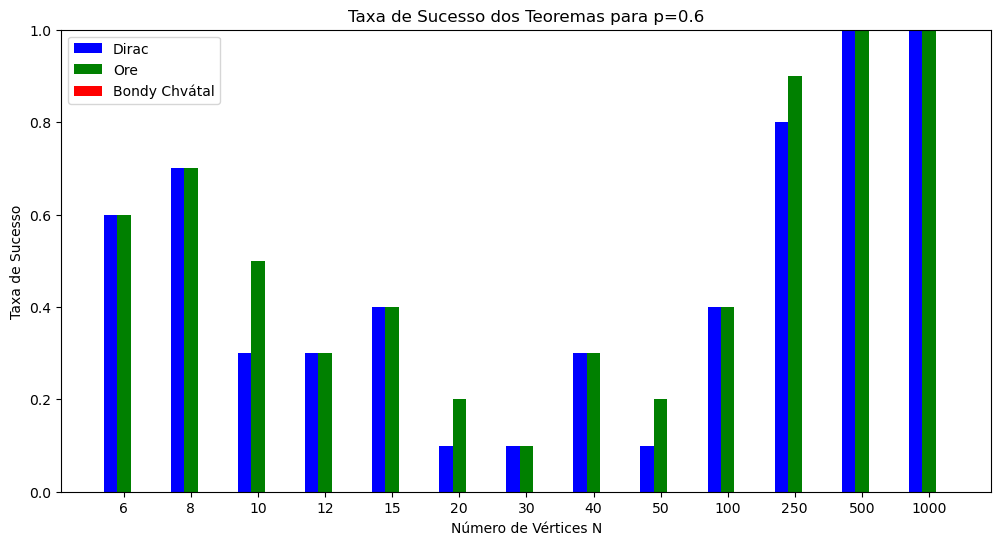

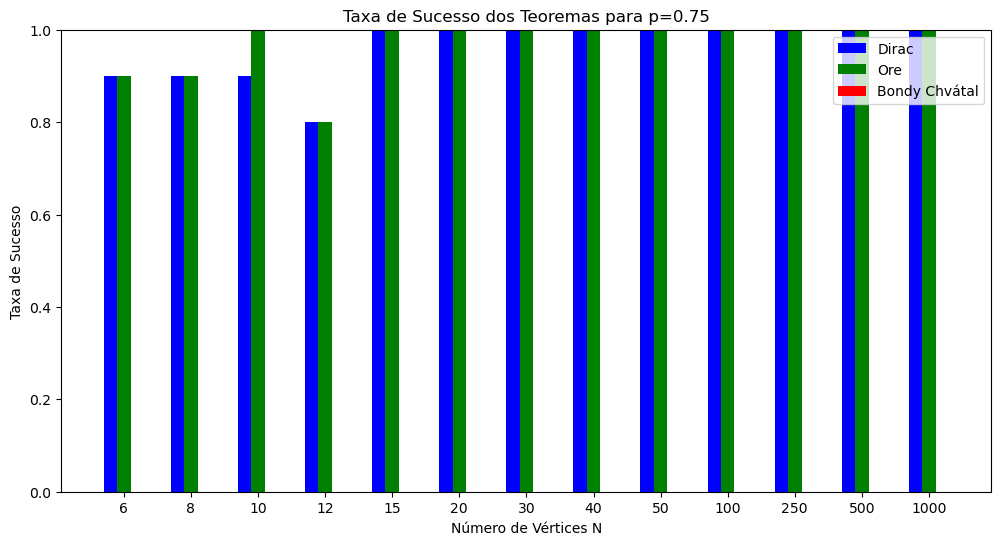

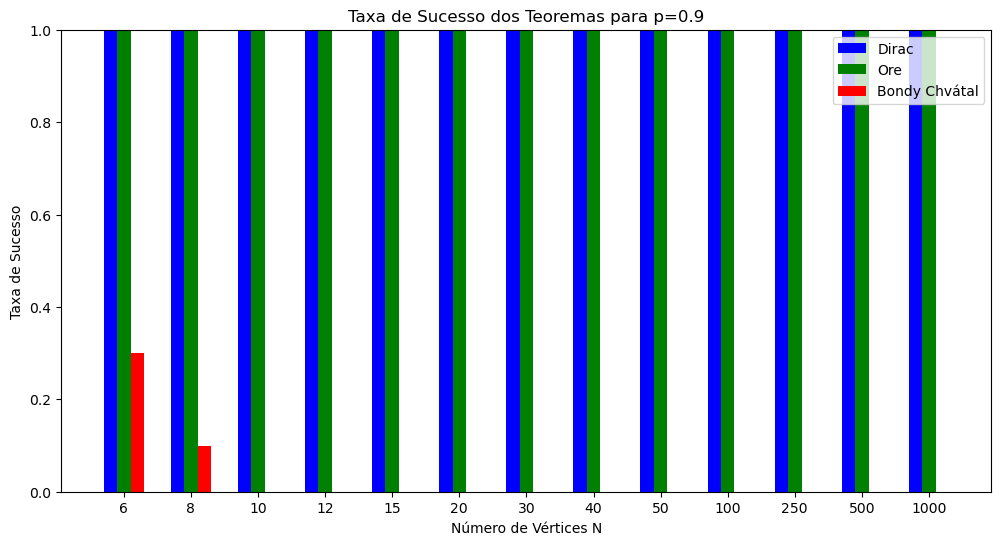

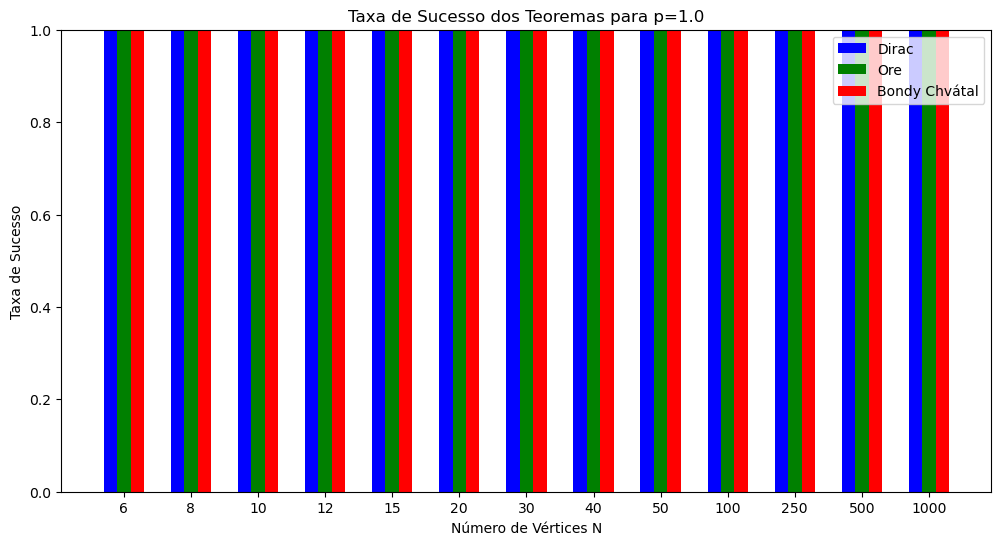

In [150]:
#Grafico de barras para cada p, taxa de sucesso (quantidade de 1) x N, dos 3 teoremas

bar_width = 0.2  
indices = np.arange(len(n_values))

for p in p_values:
    dirac_means = [df[(df['n'] == n) & (df['prob'] == p)]['Dirac'].mean() for n in n_values]
    ore_means = [df[(df['n'] == n) & (df['prob'] == p)]['Ore'].mean() for n in n_values]
    bondy_means = [df[(df['n'] == n) & (df['prob'] == p)]['Bondy_Chvatl'].mean() for n in n_values]

    plt.figure(figsize=(12, 6))
    plt.bar(indices, dirac_means, width=bar_width, label='Dirac', color='blue')
    plt.bar(indices + bar_width, ore_means, width=bar_width, label='Ore', color='green')
    plt.bar(indices + 2 * bar_width, bondy_means, width=bar_width, label='Bondy Chvátal', color='red')

    plt.title(f"Taxa de Sucesso dos Teoremas para p={p}")
    plt.xlabel("Número de Vértices N")
    plt.ylabel("Taxa de Sucesso")
    plt.xticks(indices + bar_width, n_values)
    plt.ylim(0, 1)
    plt.legend()
    plt.show()
